In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [67]:
X, y = make_classification(n_classes=2, n_samples=50, n_features = 2
                           ,n_informative=2,n_redundant = 0, 
                           n_clusters_per_class= 1)

y[y==0]=-1

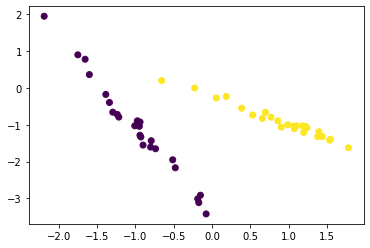

In [68]:
plt.scatter(X[:,0],X[:,1],c=y)


In [69]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solver
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -4.1125e+00 -9.8472e+00  1e+02  1e+01  2e+00
 1: -6.9618e+00 -1.0299e+01  5e+01  3e+00  6e-01
 2: -5.9234e+00 -7.4078e+00  8e+00  4e-01  8e-02
 3: -3.3954e+00 -4.3210e+00  9e-01  1e-15  5e-15
 4: -3.7172e+00 -4.3441e+00  6e-01  1e-15  4e-15
 5: -4.0415e+00 -4.1435e+00  1e-01  9e-16  1e-15
 6: -4.1023e+00 -4.1347e+00  3e-02  1e-15  1e-15
 7: -4.1291e+00 -4.1294e+00  3e-04  1e-15  1e-15
 8: -4.1294e+00 -4.1294e+00  3e-06  1e-15  1e-15
Optimal solution found.


In [70]:
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [2.07091814 4.12938672 2.05846147]
w =  [2.64864817 1.11509678]
b =  [2.52125539]


[2.64864817]
[1.11509678]
(10,)
(10,)


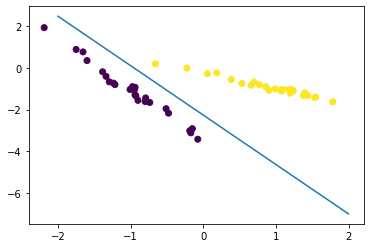

In [71]:
plt.scatter(X[:,0],X[:,1],c = y)
w1 = w[0]
w2 = w[1]
print(w1)
print(w2)
x1 = np.linspace(-2,2,10)
x2= -(w1*x1+b[0])/w2

print(x1.shape)
print(x2.shape)
plt.plot(x1,x2)